## HIE Data 정리

   1. Run all -> 1~4 데이터 자동으로 불러들인 후 RPM 그래프 출력
   2. 작업조건(Sample 명, 평가 RPM, 평가 시간) 입력
   
   주의. 파일의 생성일을 기준으로 DataFrame이 생성되므로 생성일이 변경되지 않도록 복사/이동 시 주의

## 1번 자료 DataFrame화

In [34]:
import os
from datetime import datetime 
import pandas as pd

def split_ymdhms(name):                        ##년월일시분초 분할 함수 정의
    return datetime(fileMtime.year,int(name.split("/")[1]),int(name.split("/")[2].split(" ")[0]), int(name.split("/")[2].split(" ")[1].split(":")[0]), int(name.split("/")[2].split(" ")[1].split(":")[1]), int(name.split("/")[2].split(" ")[1].split(":")[2])) 


path1= "./1"                           ## logging.csv의 folder 주소
list_1 = os.listdir(path1)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_1f = []                            ## 최종 리스트

if len(list_1)==2:                         ## logging.csv 외에 다른 파일(즉 backup 폴더)이 있다는 가정                
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path1+'\\'+list_1[1]))                  ##logging.csv 의 수정날짜
    path1b = "./1/backup"                   ## 백업파일들의 folder 주소
    list_1b = os.listdir(path1b)
    
    for i in range(len(list_1b)):
        fileMtime_1b = datetime.fromtimestamp(os.path.getmtime(path1b+'\\'+list_1b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (fileMtime.year, fileMtime.month, fileMtime.day)==(fileMtime_1b.year, fileMtime_1b.month, fileMtime_1b.day): ## 수정 날짜가 logging.csv 파일과 같다면,
            list_1f.append(list_1b[i])                                                                      ## 해당 파일을 file_list_1f 리스트에 등록
#list_1f

# csv 파일 내용을 DF 화
    for l1 in range(len(list_1f)):
        df=pd.read_csv(path1b+'\\'+list_1f[l1], encoding='utf_16')
        if l1==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame1=['']*18
            df_1=pd.DataFrame(frame1).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_1.loc[len(df_1)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path1+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_1)==1:
    for i in range(3):
        df=df.drop(i)
    frame1=['']*18
    df_1=pd.DataFrame(frame1).T
elif len(list_1f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame1=['']*18
    df_1=pd.DataFrame(frame1).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_1.loc[len(df_1)]=df.iloc[j][0].split(sep='\t') 

df_1=df_1.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_1.columns=df_1.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_1=df_1.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기

## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
last_time=df_1.iloc[len(df_1)-1]['Date'].split(' ')[0]
for i in range(df_1.index[0], df_1.index[len(df_1)-1]):
    if df_1['Date'].loc[i].split(' ')[0]!=last_time:
        df_1=df_1.drop(i)


## 시간흐름을 표현하는 Dates 열 생성
df_1['Dates']=df_1.Date.apply(split_ymdhms)                              ## datatime 활용하여 시간을 str에서 변경
df_1_start=df_1['Dates'].iloc[0]
df_1_end=df_1['Dates'].iloc[len(df_1)-1]
df_1_delta=(df_1_end-df_1_start)/(len(df_1)-1)
#df_1_delta
for i in range(len(df_1)):
    df_1['Dates'].iloc[i]=df_1_start+df_1_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)



df_1

#zek2.dtypes          # 각 column 의 type 확인
#df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환

#print ("file_list: {}".format(file_list_1))
#print ("file_list: {}".format(file_list_1b))

C:\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


1,No.,Status,Date,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP,,Dates
2,1,Logging Completed,20/11/17 9:37:36,0,0,15,0,8,6,6,2,2,4,0,2,2,1,,2020-11-17 09:37:36.000000000
3,2,Logging Completed,20/11/17 9:37:37,0,0,17,0,7,6,6,2,2,4,0,2,2,1,,2020-11-17 09:37:36.554108672
4,3,Logging Completed,20/11/17 9:37:37,0,0,14,0,7,6,7,2,2,4,0,3,2,1,,2020-11-17 09:37:37.108217344
5,4,Logging Completed,20/11/17 9:37:38,0,0,18,0,7,6,6,2,2,4,0,3,2,1,,2020-11-17 09:37:37.662326272
6,5,Logging Completed,20/11/17 9:37:39,0,0,32,0,7,6,6,2,2,4,0,2,2,1,,2020-11-17 09:37:38.216434944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21501,1020,Logging Completed,20/11/17 12:56:9,43,14,286,284,341,278,286,262,273,234,196,165,138,121,,2020-11-17 12:56:08.783564800
21502,1021,Logging Completed,20/11/17 12:56:9,70,94,140,159,397,378,336,274,268,245,199,166,138,121,,2020-11-17 12:56:09.337673472
21503,1022,Logging Completed,20/11/17 12:56:10,10,150,285,266,237,269,371,267,275,246,194,166,139,121,,2020-11-17 12:56:09.891782144
21504,1023,Logging Completed,20/11/17 12:56:10,52,68,126,308,383,375,288,273,265,247,185,167,138,121,,2020-11-17 12:56:10.445891072


In [35]:
df_1.iloc[len(df_1)-1]['Date'].split(' ')[0]

'20/11/17'

## 2번 자료 DataFrame화

In [36]:
import os
from datetime import datetime 
import pandas as pd

def split_ymdhms(name):                        ##년월일시분초 분할 함수 정의
    return datetime(int(name.split("/")[0]),int(name.split("/")[1]),int(name.split("/")[2].split(" ")[0]), int(name.split("/")[2].split(" ")[1].split(":")[0]), int(name.split("/")[2].split(" ")[1].split(":")[1]), int(name.split("/")[2].split(" ")[1].split(":")[2])) 


path2= "./2"                           ## logging.csv의 folder 주소
list_2 = os.listdir(path2)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_2f = []                            ## 최종 리스트

if len(list_2)==2:                              
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path2+'\\'+list_2[1]))                  ##logging.csv 의 수정날짜
    path2b = "./2/backup"                   ## 백업파일들의 folder 주소
    list_2b = os.listdir(path2b)
    
    for i in range(len(list_2b)):
        fileMtime_2b = datetime.fromtimestamp(os.path.getmtime(path2b+'\\'+list_2b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (fileMtime.year, fileMtime.month, fileMtime.day)==(fileMtime_2b.year, fileMtime_2b.month, fileMtime_2b.day): ## 수정 날짜가 logging.csv 파일과 같다면,
            list_2f.append(list_2b[i])                                                                      ## 해당 파일을 file_list_1f 리스트에 등록
#list_2f

# csv 파일 내용을 DF 화
    for l2 in range(len(list_2f)):
        df=pd.read_csv(path2b+'\\'+list_2f[l2], encoding='utf_16')
        if l2==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame2=['']*18
            df_2=pd.DataFrame(frame2).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_2.loc[len(df_2)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path2+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_2)==1:
    for i in range(3):
        df=df.drop(i)
    frame2=['']*18
    df_2=pd.DataFrame(frame2).T
elif len(list_2f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame2=['']*18
    df_2=pd.DataFrame(frame2).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_2.loc[len(df_2)]=df.iloc[j][0].split(sep='\t') 

df_2=df_2.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_2.columns=df_2.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_2=df_2.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기


## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
last_time=df_2.iloc[len(df_2)-1]['Date'].split(' ')[0]
for i in range(df_2.index[0], df_2.index[len(df_2)-1]):
    if df_2['Date'].loc[i].split(' ')[0]!=last_time:
        df_2=df_2.drop(i)


## 시간흐름을 표현하는 Dates 열 생성
df_2['Dates']=df_2.Date.apply(split_ymdhms)                              ## datatime 활용하여 시간을 str에서 변경
df_2_start=df_2['Dates'].iloc[0]
df_2_end=df_2['Dates'].iloc[len(df_2)-1]
df_2_delta=(df_2_end-df_2_start)/(len(df_2)-1)
#df_2_delta
for i in range(len(df_2)):
    df_2['Dates'].iloc[i]=df_2_start+df_2_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)



df_2

#zek2.dtypes          # 각 column 의 type 확인
#df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환

#print ("file_list: {}".format(file_list_1))
#print ("file_list: {}".format(file_list_1b))

1,No.,Status,Date,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP,,Dates
2037,1012,Logging Completed,2021/1/19 9:3:51,175,187,185,180,179,181,187,188,187,185,185,176,156,192,,2021-01-19 09:03:51.000000000
2038,1013,Logging Completed,2021/1/19 9:4:1,175,186,185,180,179,181,188,189,187,185,185,176,156,192,,2021-01-19 09:04:01.016556288
2039,1014,Logging Completed,2021/1/19 9:4:11,175,186,185,180,179,181,188,189,187,185,186,176,156,192,,2021-01-19 09:04:11.033112576
2040,1015,Logging Completed,2021/1/19 9:4:21,175,185,185,180,179,180,187,188,187,185,186,176,156,191,,2021-01-19 09:04:21.049668864
2041,1016,Logging Completed,2021/1/19 9:4:31,175,185,186,180,178,180,187,188,186,185,186,177,156,191,,2021-01-19 09:04:31.066225152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,772,Logging Completed,2021/1/19 14:5:41,176,181,181,176,174,176,181,183,178,178,179,173,179,190,,2021-01-19 14:05:40.933774080
3846,773,Logging Completed,2021/1/19 14:5:51,175,180,180,176,173,175,180,182,177,177,178,172,178,190,,2021-01-19 14:05:50.950330368
3847,774,Logging Completed,2021/1/19 14:6:1,175,179,179,175,172,174,180,181,176,175,177,171,178,189,,2021-01-19 14:06:00.966886656
3848,775,Logging Completed,2021/1/19 14:6:11,174,178,179,174,171,173,179,180,175,174,176,170,177,189,,2021-01-19 14:06:10.983442944


## 3번 자료 DataFrame화

In [37]:
import os
from datetime import datetime 
import pandas as pd

def split_ymdhms(name):                        ##년월일시분초 분할 함수 정의
    return datetime(int(name.split("/")[0]),int(name.split("/")[1]),int(name.split("/")[2].split(" ")[0]), int(name.split("/")[2].split(" ")[1].split(":")[0]), int(name.split("/")[2].split(" ")[1].split(":")[1]), int(name.split("/")[2].split(" ")[1].split(":")[2])) 



path3= "./3"                           ## logging.csv의 folder 주소
list_3 = os.listdir(path3)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_3f = []                            ## 최종 리스트

if len(list_3)==2:                              
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path3+'\\'+list_3[1]))                  ##logging.csv 의 수정날짜
    path3b = "./3/backup"                   ## 백업파일들의 folder 주소
    list_3b = os.listdir(path3b)
    
    for i in range(len(list_3b)):
        fileMtime_3b = datetime.fromtimestamp(os.path.getmtime(path3b+'\\'+list_3b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (fileMtime.year, fileMtime.month, fileMtime.day)==(fileMtime_3b.year, fileMtime_3b.month, fileMtime_3b.day): ## 수정 날짜가 logging.csv 파일과 같다면,
            list_3f.append(list_3b[i])                                                                      ## 해당 파일을 file_list_1f 리스트에 등록
#list_3f

# csv 파일 내용을 DF 화
    for l3 in range(len(list_3f)):
        df=pd.read_csv(path3b+'\\'+list_3f[l3], encoding='utf_16')
        if l3==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame3=['']*18
            df_3=pd.DataFrame(frame3).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_3.loc[len(df_3)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path3+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_3)==1:
    for i in range(3):
        df=df.drop(i)
    frame3=['']*18
    df_3=pd.DataFrame(frame3).T
elif len(list_3f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame3=['']*18
    df_3=pd.DataFrame(frame3).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_3.loc[len(df_3)]=df.iloc[j][0].split(sep='\t') 

df_3=df_3.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_3.columns=df_3.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_3=df_3.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기


## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
last_time=df_3.iloc[len(df_3)-1]['Date'].split(' ')[0]
for i in range(df_3.index[0], df_3.index[len(df_3)-1]):
    if df_3['Date'].loc[i].split(' ')[0]!=last_time:
        df_3=df_3.drop(i)

## 시간흐름을 표현하는 Dates 열 생성
df_3['Dates']=df_3.Date.apply(split_ymdhms)                              ## datatime 활용하여 시간을 str에서 변경
df_3_start=df_3['Dates'].iloc[0]
df_3_end=df_3['Dates'].iloc[len(df_3)-1]
df_3_delta=(df_3_end-df_3_start)/(len(df_3)-1)
#df_3_delta
for i in range(len(df_3)):
    df_3['Dates'].iloc[i]=df_3_start+df_3_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)

df_3

#zek2.dtypes          # 각 column 의 type 확인
#df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환
#print ("file_list: {}".format(file_list_1))
#print ("file_list: {}".format(file_list_1b))

1,No.,Status,Date,피드,Zone1,Zone2,Zone3,Zone4,Zone5,Zone6,클램프,네 크,헤 드,다 이,TC #1,TC #2,25-BP,,Dates
2037,1012,Logging Completed,2021/1/19 9:3:51,0,180,180,181,182,182,178,180,180,180,179,196,193,192,,2021-01-19 09:03:51.000000000
2038,1013,Logging Completed,2021/1/19 9:4:1,0,179,180,180,183,183,178,180,180,180,179,196,193,192,,2021-01-19 09:04:01.016556288
2039,1014,Logging Completed,2021/1/19 9:4:11,0,178,180,180,183,182,178,180,180,180,179,196,193,192,,2021-01-19 09:04:11.033112576
2040,1015,Logging Completed,2021/1/19 9:4:21,0,178,181,180,182,181,179,180,180,180,179,196,193,191,,2021-01-19 09:04:21.049668864
2041,1016,Logging Completed,2021/1/19 9:4:31,0,178,181,180,181,180,180,180,180,180,179,196,193,191,,2021-01-19 09:04:31.066225152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3845,772,Logging Completed,2021/1/19 14:5:41,0,177,176,174,174,170,174,180,179,180,180,192,189,190,,2021-01-19 14:05:40.933774080
3846,773,Logging Completed,2021/1/19 14:5:51,0,175,175,173,173,168,172,179,179,179,180,192,189,190,,2021-01-19 14:05:50.950330368
3847,774,Logging Completed,2021/1/19 14:6:1,0,174,173,171,171,166,171,179,179,179,179,192,188,189,,2021-01-19 14:06:00.966886656
3848,775,Logging Completed,2021/1/19 14:6:11,0,172,172,169,170,164,169,178,179,179,179,192,188,189,,2021-01-19 14:06:10.983442944


## 4번 자료 DataFrame화

In [38]:
import os
from datetime import datetime 
import pandas as pd

def split_ymdhms(name):                        ##년월일시분초 분할 함수 정의
    return datetime(int(name.split("/")[0]),int(name.split("/")[1]),int(name.split("/")[2].split(" ")[0]), int(name.split("/")[2].split(" ")[1].split(":")[0]), int(name.split("/")[2].split(" ")[1].split(":")[1]), int(name.split("/")[2].split(" ")[1].split(":")[2])) 


path4= "./4"                           ## logging.csv의 folder 주소
list_4 = os.listdir(path4)             ## logging.csv 파일이 위치한 폴더의 파일 리스트
list_4f = []                            ## 최종 리스트

if len(list_4)==2:                              
    fileMtime = datetime.fromtimestamp(os.path.getmtime(path4+'\\'+list_4[1]))                  ##logging.csv 의 수정날짜
    path4b = "./4/backup"                   ## 백업파일들의 folder 주소
    list_4b = os.listdir(path4b)
    
    for i in range(len(list_4b)):
        fileMtime_4b = datetime.fromtimestamp(os.path.getmtime(path4b+'\\'+list_4b[i]))         ## backup 폴더에 들어있는 파일의 수정날짜
        if (fileMtime.year, fileMtime.month, fileMtime.day)==(fileMtime_4b.year, fileMtime_4b.month, fileMtime_4b.day): ## 수정 날짜가 logging.csv 파일과 같다면,
            list_4f.append(list_4b[i])                                                                      ## 해당 파일을 file_list_1f 리스트에 등록
#list_4f

# csv 파일 내용을 DF 화
    for l4 in range(len(list_4f)):
        df=pd.read_csv(path4b+'\\'+list_4f[l4], encoding='utf_16')
        if l4==0:                                                                     ## 같은 날 작업한 파일 여러개 중 첫번째 파일만 제목줄 추출
            for i in range(3):
                df=df.drop(i)
            frame4=['']*18
            df_4=pd.DataFrame(frame4).T
        else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
            for i in range(4):
                df=df.drop(i)
        for j in range(len(df)):
            df_4.loc[len(df_4)]=df.iloc[j][0].split(sep='\t')                        ## df_1 의 마지막행 아래에 추가하는 방식

df=pd.read_csv(path4+'\\'+'logging.csv', encoding='utf_16')                       ## 마지막으로 logging.csv 파일을 붙여줌
if len(list_4)==1:
    for i in range(3):
        df=df.drop(i)
    frame4=['']*18
    df_4=pd.DataFrame(frame4).T
elif len(list_4f)==0:                                                        ## backup 폴더가 있지만 logging.csv와 동일한 날에 작업한 파일이 없는 경우
    for i in range(3):
        df=df.drop(i)
    frame4=['']*18
    df_4=pd.DataFrame(frame4).T  
else:                                                                        ## 같은날 작업한 파일 여러개 중 두번째 이후엔 제목줄 불필요
    for i in range(4):
        df=df.drop(i)
for j in range(len(df)):
    df_4.loc[len(df_4)]=df.iloc[j][0].split(sep='\t') 

df_4=df_4.drop(0)                                               ## 최초 df_1에 생성한 빈칸 날리기
df_4.columns=df_4.iloc[0]                                       ## 이후 제목 행을 컬럼으로 변경
df_4=df_4.drop(1)                                               ## 그리고 제목이 들어있던 행 날리기


## 데이터 앞쪽의 다른 날 평가한 데이터행을 삭제
last_time=df_4.iloc[len(df_4)-1]['Date'].split(' ')[0]
for i in range(df_4.index[0], df_4.index[len(df_4)-1]):
    if df_4['Date'].loc[i].split(' ')[0]!=last_time:
        df_4=df_4.drop(i)

#zek2.dtypes          # 각 column 의 type 확인
#df_1=df_1.astype({'6.5D':int})                     ## 컬럼을 통째로 str -> int로 변환

## 시간흐름을 표현하는 Dates 열 생성
df_4['Dates']=df_4.Date.apply(split_ymdhms)                              ## datatime 활용하여 시간을 str에서 변경
df_4_start=df_4['Dates'].iloc[0]
df_4_end=df_4['Dates'].iloc[len(df_4)-1]
df_4_delta=(df_4_end-df_4_start)/(len(df_4)-1)
df_4_delta
for i in range(len(df_4)):
    df_4['Dates'].iloc[i]=df_4_start+df_4_delta*i                        ## 여기까지 시간의 처음과 끝을 설정하여 중간 시간을 나눠서 표현(1번 logging 시 초까지 동일한 행이 있기 때문)

df_4
#print ("file_list: {}".format(file_list_1))
#print ("file_list: {}".format(file_list_1b))

1,No.,Status,Date,스크류,모터회전,모터부하,냉각#1,냉각#2,Para 1,Para 2,Para 3,Para 4,Para 5,Para 6,Para 7,Para 8,Para 9,,Dates
2,1,Logging Completed,2020/11/17 9:37:37,5.1,133,64,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 09:37:37.000000000
3,2,Logging Completed,2020/11/17 9:37:42,5.1,131,75,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 09:37:40.343862016
4,3,Logging Completed,2020/11/17 9:37:46,5.1,131,77,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 09:37:43.687723776
5,4,Logging Completed,2020/11/17 9:37:51,5.0,129,82,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 09:37:47.031585792
6,5,Logging Completed,2020/11/17 9:37:56,5.0,129,86,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 09:37:50.375447808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3069,1020,Logging Completed,2020/11/17 12:28:26,30.1,780,362,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 12:28:32.624551680
3070,1021,Logging Completed,2020/11/17 12:28:34,30.0,777,367,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 12:28:35.968413440
3071,1022,Logging Completed,2020/11/17 12:28:36,29.9,775,367,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 12:28:39.312275456
3072,1023,Logging Completed,2020/11/17 12:28:41,30.1,779,367,1190,1187,0,0,0,0,0,0,0,0,0,,2020-11-17 12:28:42.656137472


## RPM Graph

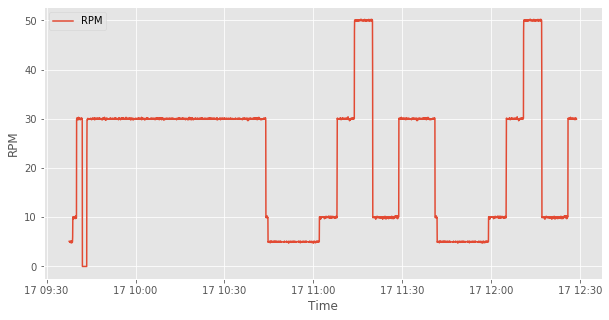

In [48]:
import matplotlib.pyplot as plt
df_4a=df_4
df_4a=df_4a.astype({'스크류':float})                     ## 컬럼을 통째로 str -> int로 변환

plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.xlabel('Time')
plt.ylabel('RPM')
plt.plot(df_4a['Dates'],df_4a['스크류'], label='RPM')
#plt.plot(df_4a['Dates'],df_4a['모터부하'], label='Load')
plt.legend()
plt.show()

## 평가 정보 입력 (샘플명, RPM, 평가 시간 등)

In [42]:
import pandas as pd
test_name=input('샘플명을 입력하세요(구분:쉼표): ').split(',')
test_rpm=input('RPM 조건을 입력하세요(구분:쉼표): ').split(',')
test_no=0
test_aa=['']*3
test_list=pd.DataFrame(test_aa).T
for i in range(len(test_name)):
    for j in range(len(test_rpm)):
        test_sample=[]
        test_sample.append(test_no)
        test_sample.append(test_name[i])
        test_sample.append(test_rpm[j])
        test_list.loc[test_no]=test_sample
        test_no+=1
test_list.columns=['No','Sample','RPM']
test_list.index=test_list.No
del test_list['No']
print(test_list)
test_exclud=input('평가하지 않은 조건이 있으면 번호를 입력하세요(구분:쉼표): ').split(',')
for i in range(len(test_exclud)):
    test_list=test_list.drop(int(test_exclud[i]))

test_list.reset_index(drop=True, inplace=True)                            ## 평가하지 않은 조건을 잘라내고 다시 인덱스 설정
print(test_list)

#평가시간 입력받기
test_time=['']*(len(test_list))
test_time2=['']*(len(test_list))
print('시작시간~종료시간을 입력해 주세요(hh:mm:ss~hh:mm:ss)')
yy=int(df_4.iloc[0,2].split('/')[0])                            ## 평가 시작시간/종료시간을 datetime 함수로 변환하기 위해, 연/월/일 설정
mm=int(df_4.iloc[0,2].split('/')[1])
dd=int(df_4.iloc[0,2].split('/')[2].split()[0])
for i in range(len(test_list)):    
    test_time[i]=input(str(i)+'. Sample:'+test_list.iloc[i,0]+', RPM: '+test_list.iloc[i,1]+': ')    ## DataFrame에서 특정 셀의 값 읽기
    test_time2[i]=test_time[i].split('~') 
    for j in range(2):
        test_time2[i][j]=test_time2[i][j]+':00'                  ## 초 단위 입력하지 않았을 때 오류 생기는 것을 방지하기 위해 00초 붙임
        test_time2[i][j]=datetime(yy,mm,dd,int(test_time2[i][j].split(':')[0]),int(test_time2[i][j].split(':')[1]),int(test_time2[i][j].split(':')[2]))
        
# test_time2: 입력시간을 전/후로 나눈 뒤 datetime 함수를 먹인 것 ==> 이제 df_1~df4 의 Dates와 연동시킬 수 있다.





## df_1_Final 포맷 만들기
df_1_Final=pd.DataFrame(columns=['Sample','RPM','Time','6.5D','8.0D','9.5D','11.0D','12.5D','14.0D','15.5D','17.0D','18.5D','20.0D','21.5D','23.0D','24-BP','25-BP'])

for tl in range(len(test_list)):
    df_1_element=[]
    df_1_element.append(test_list.iloc[tl,0])
    df_1_element.append(test_list.iloc[tl,1])
    df_1_element.append(test_time[tl])
                             
    df_1_a=df_1[(df_1['Dates']>test_time2[tl][0])&(df_1['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_1_a=df_1_a.astype({df_1_a.columns[i]:int})
        df_1_element.append(df_1_a[df_1_a.columns[i]].mean())
    df_1_Final.loc[tl]=df_1_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_1_Final


## df_2_Final 포맷 만들기
df_2_Final=pd.DataFrame(columns=['Sample','RPM','Time','6.5D','8.0D','9.5D','11.0D','12.5D','14.0D','15.5D','17.0D','18.5D','20.0D','21.5D','23.0D','24-BP','25-BP'])

for tl in range(len(test_list)):
    df_2_element=[]
    df_2_element.append(test_list.iloc[tl,0])
    df_2_element.append(test_list.iloc[tl,1])
    df_2_element.append(test_time[tl])
                             
    df_2_a=df_2[(df_2['Dates']>test_time2[tl][0])&(df_2['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_2_a=df_2_a.astype({df_2_a.columns[i]:int})
        df_2_element.append(df_2_a[df_2_a.columns[i]].mean())
    df_2_Final.loc[tl]=df_2_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_2_Final


## df_3_Final 포맷 만들기
df_3_Final=pd.DataFrame(columns=['Sample','RPM','Time','피드','Zone1','Zone2','Zone3','Zone4','Zone5','Zone6','클램프','네크','헤드','다이','TC#1','TC#2','25-BP'])

for tl in range(len(test_list)):
    df_3_element=[]
    df_3_element.append(test_list.iloc[tl,0])
    df_3_element.append(test_list.iloc[tl,1])
    df_3_element.append(test_time[tl])
                             
    df_3_a=df_3[(df_3['Dates']>test_time2[tl][0])&(df_3['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_3_a=df_3_a.astype({df_3_a.columns[i]:int})
        df_3_element.append(df_3_a[df_3_a.columns[i]].mean())
    df_3_Final.loc[tl]=df_3_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_3_Final


## df_4_Final 포맷 만들기
df_4_Final=pd.DataFrame(columns=['Sample','RPM','Time','스크류','모터회전','모터부하','냉각#1','냉각#2','Para1','Para2','Para3','Para4','Para5','Para6','Para7','Para8','Para9'])

for tl in range(len(test_list)):
    df_4_element=[]
    df_4_element.append(test_list.iloc[tl,0])
    df_4_element.append(test_list.iloc[tl,1])
    df_4_element.append(test_time[tl])
                             
    df_4_a=df_4[(df_4['Dates']>test_time2[tl][0])&(df_4['Dates']<test_time2[tl][1])]  ## test_time2에 설정한 시간조건에 해당하는 df_2의 데이터를 df_2_a에 출력

    for i in range(3,17):
        df_4_a=df_4_a.astype({df_4_a.columns[i]:float})                                 ## 스크류 rpm이 소수첫째자리까지 측정되므로 float로 변환
        df_4_element.append(df_4_a[df_4_a.columns[i]].mean())
    df_4_Final.loc[tl]=df_4_element
pd.options.display.float_format = '{:.1f}'.format  ## 계산된 값을 소수점 첫째 자리까지만 표현
#df_4_Final

샘플명을 입력하세요(구분:쉼표): a,b
RPM 조건을 입력하세요(구분:쉼표): 10,30,50
   Sample RPM
No           
0       a  10
1       a  30
2       a  50
3       b  10
4       b  30
5       b  50
평가하지 않은 조건이 있으면 번호를 입력하세요(구분:쉼표): 0,2
  Sample RPM
0      a  30
1      b  10
2      b  30
3      b  50
시작시간~종료시간을 입력해 주세요(hh:mm:ss~hh:mm:ss)
0. Sample:a, RPM: 30: 10:50~10:55
1. Sample:b, RPM: 10: 12:20~12:24
2. Sample:b, RPM: 30: 12:28~12:32
3. Sample:b, RPM: 50: 12:36~12:41


## 평가정보 확인

In [51]:
df_1_Final
#df_2_Final
#df_3_Final
#df_4_Final

,Sample,RPM,Time,6.5D,8.0D,9.5D,11.0D,12.5D,14.0D,15.5D,17.0D,18.5D,20.0D,21.5D,23.0D,24-BP,25-BP
0,a,30,10:50~10:55,63.0,41.0,113.0,120.6,149.4,151.2,141.2,125.8,139.3,131.7,106.8,106.4,105.1,94.9
1,b,10,12:20~12:24,44.4,75.1,198.4,234.4,288.4,292.1,267.4,232.4,232.0,204.9,164.3,145.7,120.5,105.1
2,b,30,12:28~12:32,48.0,72.5,191.5,229.2,282.7,298.3,283.7,238.6,244.2,220.5,175.4,155.6,133.2,116.8
3,b,50,12:36~12:41,59.9,60.3,158.3,168.1,232.7,244.7,232.0,195.9,206.9,190.5,152.6,141.0,129.1,114.8


In [ ]:
df_4_Final.drop('Time')

#pd.merge(df_1_Final,df_4_Final, on='Time', how='left')

In [ ]:
## 압력분포 그래프 그리기

x_tick=[]
y_tick=[[]]*len(df_1_Final)
for i in range(14):
    x_tick.append(df_1_Final.columns[i+3])
for j in range(len(df_1_Final)):
    for i in range(14):
        y_tick[j].append(df_1_Final.iloc[j][i+3])
    
plt.figure(figsize=(10,5))
plt.style.use('ggplot')
plt.xlabel('Time(sec)')
plt.ylabel('RPM')
plt.plot(df_4a['Dates'],df_4a['스크류'], label='RPM')
for j in range(len(df_1_Final)):
    plt.plot(x_tick, y_tick[j], label=df_1_Final.iloc[j][1])
plt.legend()
plt.show()
#y_tick